In [275]:
pip install plotly

In [352]:
import numpy as np 
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

In [393]:
data = pd.read_csv(r'G:\DA_Work\Python\Data Analysis Projects\NetFliex Dataset\file.csv')
data

Show_Id Category                                    Title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                    07:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7784   s7783    Movie                                     Zozo   
7785   s7784    Movie                                   Zubaan   
7786   s7785    Movie                        Zulu Man in Japan   
7787   s7786  TV Show                    Zumbo's Just Desserts   
7788   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               Director                                               Cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7784        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7785        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7786                NaN                                            Nasty C   
7787                NaN                         Adriano Zumbo, Rachel Khoo   
7788           Sam Dunn                                                NaN   

                                                Country        Release_Date  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
4                                         United States     January 1, 2020   
...                                                 ...                 ...   
7784  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7785                                              India       March 2, 2019   
7786                                                NaN  September 25, 2020   
7787                                          Australia    October 31, 2020   
7788              United Kingdom, Canada, United States       March 1, 2020   

     Rating   Duration                                               Type  \
0     TV-MA  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
1     TV-MA     93 min                       Dramas, International Movies   
2         R     78 min                Horror Movies, International Movies   
3     PG-13     80 min  Action & Adventure, Independent Movies, Sci-Fi...   
4     PG-13    123 min                                             Dramas   
...     ...        ...                                                ...   
7784  TV-MA     99 min                       Dramas, International Movies   
7785  TV-14    111 min     Dramas, International Movies, Music & Musicals   
7786  TV-MA     44 min  Documentaries, International Movies, Music & M...   
7787  TV-PG   1 Season                 International TV Shows, Reality TV   
7788  TV-MA     90 min                    Documentaries, Music & Musicals   

                                            Description  
0     In a future where the elite inhabit an island ...  
1     After a devastating earthquake hits Mexico Cit...  
2     When an army recruit is found dead, his fellow...  
3     In a postapocalyptic world, rag-doll robots hi...  
4     A brilliant group of students become card-coun...  
...                                                 .

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [17]:
data.tail()

Show_Id Category                                    Title     Director  \
7784   s7783    Movie                                     Zozo  Josef Fares   
7785   s7784    Movie                                   Zubaan  Mozez Singh   
7786   s7785    Movie                        Zulu Man in Japan          NaN   
7787   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7788   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   Cast  \
7784  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7785  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7786                                            Nasty C   
7787                         Adriano Zumbo, Rachel Khoo   
7788                                                NaN   

                                                Country        Release_Date  \
7784  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7785                                              India       March 2, 2019   
7786                                                NaN  September 25, 2020   
7787                                          Australia    October 31, 2020   
7788              United Kingdom, Canada, United States       March 1, 2020   

     Rating  Duration                                               Type  \
7784  TV-MA    99 min                       Dramas, International Movies   
7785  TV-14   111 min     Dramas, International Movies, Music & Musicals   
7786  TV-MA    44 min  Documentaries, International Movies, Music & M...   
7787  TV-PG  1 Season                 International TV Shows, Reality TV   
7788  TV-MA    90 min                    Documentaries, Music & Musicals   

                                            Description  
7784  When Lebanon's Civil War deprives Zozo of his ...  
7785  A scrappy but poor boy worms his way into a ty...  
7786  In this documentary, South African rapper Nast...  
7787  Dessert wizard Adriano Zumbo looks for the nex...  
7788  This documentary delves into the mystique behi...

In [31]:
#Change the dataType
# Convert 'Date' column to datetime, let Pandas infer the format
data['Release_Date'] = pd.to_datetime(data['Release_Date'], errors='coerce')  # 'coerce' will handle any problematic entries

# Display the Data
data

Show_Id Category                                    Title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                    07:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7784   s7783    Movie                                     Zozo   
7785   s7784    Movie                                   Zubaan   
7786   s7785    Movie                        Zulu Man in Japan   
7787   s7786  TV Show                    Zumbo's Just Desserts   
7788   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               Director                                               Cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7784        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7785        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7786                NaN                                            Nasty C   
7787                NaN                         Adriano Zumbo, Rachel Khoo   
7788           Sam Dunn                                                NaN   

                                                Country Release_Date Rating  \
0                                                Brazil   2020-08-14  TV-MA   
1                                                Mexico   2016-12-23  TV-MA   
2                                             Singapore   2018-12-20      R   
3                                         United States   2017-11-16  PG-13   
4                                         United States   2020-01-01  PG-13   
...                                                 ...          ...    ...   
7784  Sweden, Czech Republic, United Kingdom, Denmar...   2020-10-19  TV-MA   
7785                                              India   2019-03-02  TV-14   
7786                                                NaN   2020-09-25  TV-MA   
7787                                          Australia   2020-10-31  TV-PG   
7788              United Kingdom, Canada, United States   2020-03-01  TV-MA   

       Duration                                               Type  \
0     4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
1        93 min                       Dramas, International Movies   
2        78 min                Horror Movies, International Movies   
3        80 min  Action & Adventure, Independent Movies, Sci-Fi...   
4       123 min                                             Dramas   
...         ...                                                ...   
7784     99 min                       Dramas, International Movies   
7785    111 min     Dramas, International Movies, Music & Musicals   
7786     44 min  Documentaries, International Movies, Music & M...   
7787   1 Season                 International TV Shows, Reality TV   
7788     90 min                    Documentaries, Music & Musicals   

                                            Description  
0     In a future where the elite inhabit an island ...  
1     After a devastating earthquake hits Mexico Cit...  
2     When an army recruit is found dead, his fellow...  
3     In a postapocalyptic world, rag-doll robots hi...  
4     A brilliant group of students become card-coun...  
...                                                 ...  
7784  When Lebanon's Civil War deprives Zozo of his ...  
7785  A scrappy but p

In [39]:
#Show the dublicates
all_duplicates = data[data.duplicated(keep=False)]
all_duplicates


Show_Id Category              Title        Director  \
683     s684    Movie           Backfire     Dave Patten   
4839   s6621    Movie  The Lost Okoroshi  Abba T. Makama   
6300    s684    Movie           Backfire     Dave Patten   
6622   s6621    Movie  The Lost Okoroshi  Abba T. Makama   

                                                   Cast        Country  \
683   Black Deniro, Byron "Squally" Vinson, Dominic ...  United States   
4839  Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...        Nigeria   
6300  Black Deniro, Byron "Squally" Vinson, Dominic ...  United States   
6622  Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...        Nigeria   

     Release_Date Rating Duration                                   Type  \
683    2019-04-05  TV-MA   97 min  Dramas, Independent Movies, Thrillers   
4839   2020-09-04  TV-MA   94 min   Comedies, Dramas, Independent Movies   
6300   2019-04-05  TV-MA   97 min  Dramas, Independent Movies, Thrillers   
6622   2020-09-04  TV-MA   94 min   Comedies, Dramas, Independent Movies   

                                            Description  
683   When two would-be robbers accidentally kill a ...  
4839  A disillusioned security guard transforms into...  
6300  When two would-be robbers accidentally kill a ...  
6622  A disillusioned security guard transforms into...

In [43]:
#Remove the dublicates
data = data.drop_duplicates()
data[data.duplicated()]

Empty DataFrame
Columns: [Show_Id, Category, Title, Director, Cast, Country, Release_Date, Rating, Duration, Type, Description]
Index: []

In [45]:
data.isnull()

Show_Id  Category  Title  Director   Cast  Country  Release_Date  \
0       False     False  False      True  False    False         False   
1       False     False  False     False  False    False         False   
2       False     False  False     False  False    False         False   
3       False     False  False     False  False    False         False   
4       False     False  False     False  False    False         False   
...       ...       ...    ...       ...    ...      ...           ...   
7784    False     False  False     False  False    False         False   
7785    False     False  False     False  False    False         False   
7786    False     False  False      True  False     True         False   
7787    False     False  False      True  False    False         False   
7788    False     False  False     False   True    False         False   

      Rating  Duration   Type  Description  
0      False     False  False        False  
1      False     False  False        False  
2      False     False  False        False  
3      False     False  False        False  
4      False     False  False        False  
...      ...       ...    ...          ...  
7784   False     False  False        False  
7785   False     False  False        False  
7786   False     False  False        False  
7787   False     False  False        False  
7788   False     False  False        False  

[7787 rows x 11 columns]

In [47]:
data.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      98
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

<Axes: >

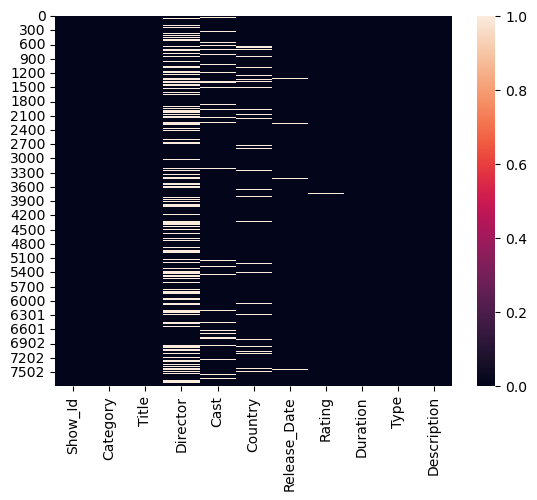

In [53]:
#Use HeatMap
sns.heatmap(data.isnull())

In [57]:
#Doing Search with Isin
data[data['Title'].isin(['The Lost Okoroshi'])]

Show_Id Category              Title        Director  \
4839   s6621    Movie  The Lost Okoroshi  Abba T. Makama   

                                                   Cast  Country Release_Date  \
4839  Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...  Nigeria   2020-09-04   

     Rating Duration                                  Type  \
4839  TV-MA   94 min  Comedies, Dramas, Independent Movies   

                                            Description  
4839  A disillusioned security guard transforms into...

In [61]:
#Doing Search with Str.Contain
data[data['Title'].str.contains('The Lost Okoroshi')]

Show_Id Category              Title        Director  \
4839   s6621    Movie  The Lost Okoroshi  Abba T. Makama   

                                                   Cast  Country Release_Date  \
4839  Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...  Nigeria   2020-09-04   

     Rating Duration                                  Type  \
4839  TV-MA   94 min  Comedies, Dramas, Independent Movies   

                                            Description  
4839  A disillusioned security guard transforms into...

In [65]:
#Now i want to get the hiighest number of TV& Movies THROUGH YEARS and months With Bar Graph
data['Release_Date'].dt.year.value_counts()

Release_Date
2019.0    2136
2020.0    2008
2018.0    1661
2017.0    1201
2016.0     432
2021.0     117
2015.0      79
2014.0      24
2011.0      13
2013.0      10
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: count, dtype: int64

<Axes: xlabel='Release_Date'>

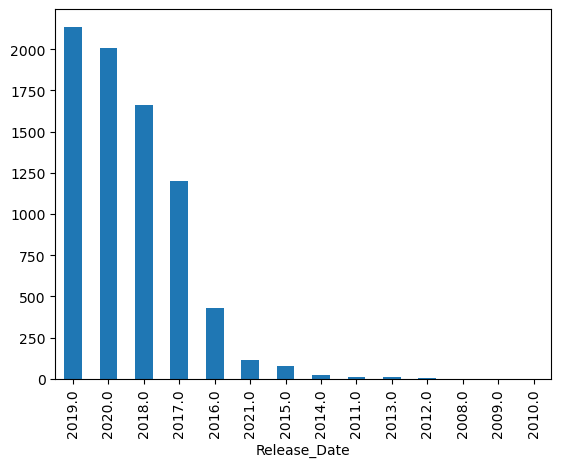

In [69]:
#Through Years
data['Release_Date'].dt.year.value_counts().plot(kind='bar')

<Axes: xlabel='Release_Date'>

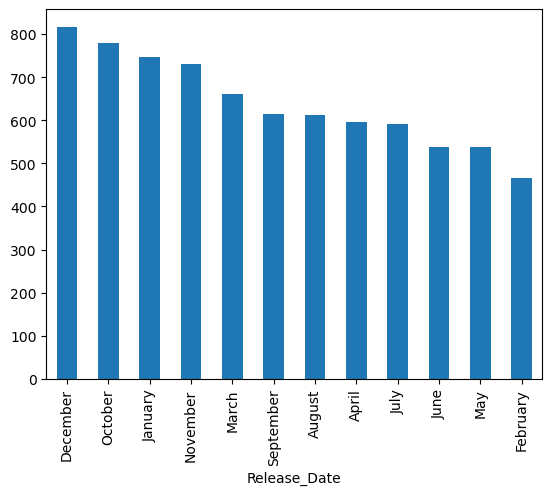

In [85]:
#Through Months
import calendar

# Convert 'Release_Date' to datetime format, handling errors (coerce invalid dates to NaT)
data['Release_Date'] = pd.to_datetime(data['Release_Date'], errors='coerce')

# Drop NaT (missing) values before extracting the month
data_clean = data.dropna(subset=['Release_Date'])

# Get the month numbers and their value counts
month_counts = data_clean['Release_Date'].dt.month.value_counts()

# Replace the month numbers with their corresponding month names
month_counts.index = month_counts.index.map(lambda x: calendar.month_name[int(x)])

# Plot the bar chart with month names
month_counts.plot(kind='bar')


In [89]:
#Using Groupby
data.groupby('Category').Category.count()

Category
Movie      5377
TV Show    2410
Name: Category, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

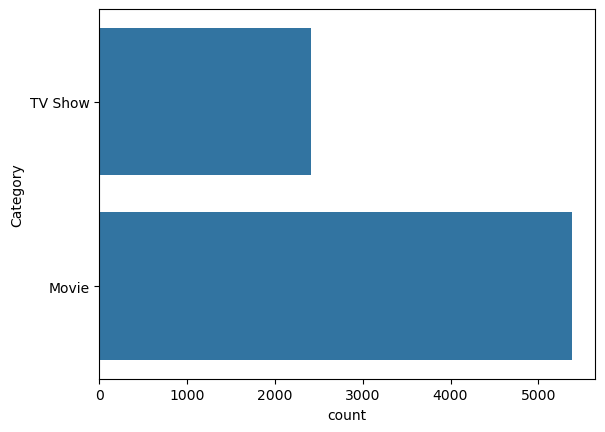

In [91]:
sns.countplot(data['Category'])

In [95]:
#I will create  a Column with Year 
data['Year'] = data['Release_Date'].dt.year
data

Show_Id Category                                    Title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                    07:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7784   s7783    Movie                                     Zozo   
7785   s7784    Movie                                   Zubaan   
7786   s7785    Movie                        Zulu Man in Japan   
7787   s7786  TV Show                    Zumbo's Just Desserts   
7788   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               Director                                               Cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7784        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7785        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7786                NaN                                            Nasty C   
7787                NaN                         Adriano Zumbo, Rachel Khoo   
7788           Sam Dunn                                                NaN   

                                                Country Release_Date Rating  \
0                                                Brazil   2020-08-14  TV-MA   
1                                                Mexico   2016-12-23  TV-MA   
2                                             Singapore   2018-12-20      R   
3                                         United States   2017-11-16  PG-13   
4                                         United States   2020-01-01  PG-13   
...                                                 ...          ...    ...   
7784  Sweden, Czech Republic, United Kingdom, Denmar...   2020-10-19  TV-MA   
7785                                              India   2019-03-02  TV-14   
7786                                                NaN   2020-09-25  TV-MA   
7787                                          Australia   2020-10-31  TV-PG   
7788              United Kingdom, Canada, United States   2020-03-01  TV-MA   

       Duration                                               Type  \
0     4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
1        93 min                       Dramas, International Movies   
2        78 min                Horror Movies, International Movies   
3        80 min  Action & Adventure, Independent Movies, Sci-Fi...   
4       123 min                                             Dramas   
...         ...                                                ...   
7784     99 min                       Dramas, International Movies   
7785    111 min     Dramas, International Movies, Music & Musicals   
7786     44 min  Documentaries, International Movies, Music & M...   
7787   1 Season                 International TV Shows, Reality TV   
7788     90 min                    Documentaries, Music & Musicals   

                                            Description    Year  
0     In a future where the elite inhabit an island ...  2020.0  
1     After a devastating earthquake hits Mexico Cit...  2016.0  
2     When an army recruit is found dead, his fellow...  2018.0  
3     In a postapocalyptic world, rag-doll robots hi...  2017.0  
4     A brilliant group of students become card-coun...  2020.0  
...                                                 ...     ...  
7784  When Lebanon's Ci

In [121]:
#Some  Filtering 
data[(data['Category'] == 'Movie') & (data['Year'] == 2020)]


Show_Id Category                                    Title  \
4         s5    Movie                                       21   
6         s7    Movie                                      122   
14       s15    Movie                                     3022   
27       s28    Movie                                   #Alive   
28       s29    Movie            #AnneFrank - Parallel Stories   
...      ...      ...                                      ...   
7762   s7761    Movie                                Zaki Chan   
7783   s7782    Movie                                     Zoom   
7784   s7783    Movie                                     Zozo   
7786   s7785    Movie                        Zulu Man in Japan   
7788   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                         Director  \
4                  Robert Luketic   
6                 Yasir Al Yasiri   
14                     John Suits   
27                         Cho Il   
28    Sabina Fedeli, Anna Migotto   
...                           ...   
7762                   Wael Ihsan   
7783                 Peter Hewitt   
7784                  Josef Fares   
7786                          NaN   
7788                     Sam Dunn   

                                                   Cast  \
4     Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
6     Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...   
14    Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...   
27                             Yoo Ah-in, Park Shin-hye   
28                          Helen Mirren, Gengher Gatti   
...                                                 ...   
7762  Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...   
7783  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
7784  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7786                                            Nasty C   
7788                                                NaN   

                                                Country Release_Date Rating  \
4                                         United States   2020-01-01  PG-13   
6                                                 Egypt   2020-06-01  TV-MA   
14                                        United States   2020-03-19      R   
27                                          South Korea   2020-09-08  TV-MA   
28                                                Italy   2020-07-01  TV-14   
...                                                 ...          ...    ...   
7762                                              Egypt   2020-05-19  TV-PG   
7783                                      United States   2020-01-11     PG   
7784  Sweden, Czech Republic, United Kingdom, Denmar...   2020-10-19  TV-MA   
7786                                                NaN   2020-09-25  TV-MA   
7788              United Kingdom, Canada, United States   2020-03-01  TV-MA   

     Duration                                               Type  \
4     123 min                                             Dramas   
6      95 min                Horror Movies, International Movies   
14     91 min    Independent Movies, Sci-Fi & Fantasy, Thrillers   
27     99 min     Horror Movies, International Movies, Thrillers   
28     95 min                Documentaries, International Movies   
...       ...                                                ...   
7762  109 min    Comedies, International Movies, Romantic Movies   
7783   88 min                 Children & Family Movies, Comedies   
7784   99 min                       Dramas, International Movies   
7786   44 min  Documentaries, International Movies, Music & M...   
7788   90 min                    Documentaries, Music & Musicals   

                                            Description    Year  
4     A brilliant group of students become card-coun...  2020.0  
6     After an awful accident, a couple admitted to ...  2020.0  
14    Stranded when the Earth is suddenly destroyed ...  2020.0  
27    As a grisly virus ramp

In [123]:
#Filteration
data[(data['Category'] == 'TV Show') & (data['Country'] == 'India')]

Show_Id Category                               Title     Director  \
86       s87  TV Show        21 Sarfarosh: Saragarhi 1897          NaN   
132     s133  TV Show                           7 (Seven)  Nizar Shafi   
340     s341  TV Show                        Agent Raghav          NaN   
364     s365  TV Show                        Akbar Birbal          NaN   
533     s534  TV Show                 Anjaan: Rural Myths          NaN   
...      ...      ...                                 ...          ...   
6249   s6249  TV Show                The Creative Indians          NaN   
6400   s6399  TV Show  The Golden Years with Javed Akhtar          NaN   
6469   s6468  TV Show              The House That Made Me          NaN   
7294   s7293  TV Show                          Typewriter          NaN   
7705   s7704  TV Show                     Yeh Meri Family          NaN   

                                                   Cast Country Release_Date  \
86                   Luke Kenny, Mohit Raina, Mukul Dev   India   2018-12-01   
132   Rahman, Havish, Regina Cassandra, Nandita Swet...   India   2019-07-30   
340   Sharad Kelkar, Aahana Kumra, Mahesh Manjrekar,...   India   2017-04-15   
364           Kiku Sharda, Vishal Kotian, Delnaaz Irani   India   2020-03-31   
533                                                 NaN   India   2018-12-15   
...                                                 ...     ...          ...   
6249                                                NaN   India   2020-08-24   
6400                                                NaN   India   2017-06-01   
6469                                       Vinay Pathak   India   2017-03-31   
7294  Aarna Sharma, Aaryansh Malviya, Mikail Gandhi,...   India   2019-07-19   
7705  Vishesh Bansal, Mona Singh, Akarsh Khurana, Ah...   India   2018-08-31   

     Rating   Duration                                               Type  \
86    TV-14   1 Season                  International TV Shows, TV Dramas   
132   TV-14   1 Season                                           TV Shows   
340   TV-14   1 Season  Crime TV Shows, International TV Shows, TV Act...   
364    TV-G   1 Season                   Kids' TV, TV Comedies, TV Dramas   
533   TV-14   1 Season    International TV Shows, TV Horror, TV Thrillers   
...     ...        ...                                                ...   
6249  TV-MA  2 Seasons                 Docuseries, International TV Shows   
6400   TV-G   1 Season                 Docuseries, International TV Shows   
6469  TV-PG  3 Seasons                 International TV Shows, Reality TV   
7294  TV-MA   1 Season    International TV Shows, TV Horror, TV Mysteries   
7705  TV-PG   1 Season                International TV Shows, TV Comedies   

                                            Description    Year  
86    In one of history's greatest last stands, a ba...  2018.0  
132   Multiple women report their husbands as missin...  2019.0  
340   A mix of brilliance, erudition and skill enabl...  2017.0  
364   From battles of wit to fights for justice, Emp...  2020.0  
533   Spine-chilling stories of malevolent spirits u...  2018.0  
...                                                 ...     ...  
6249  From chefs and comedians to filmmakers and fas...  2020.0  
6400  Writer, poet and lyricist Javed Akhtar hosts t...  2017.0  
6469  With host Vinay Pathak, Indian celebrities ret...  2017.0  
7294  Three young friends in Goa plan to search an o...  2019.0  
7705  In the summer of 1998, middle child Harshu bal...  2018.0  

[71 rows x 12 columns]

In [125]:
data['Director'].value_counts().head(10)

Director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: count, dtype: int64

In [129]:
data[(data['Category'] == 'TV Show') & (data['Country'] == 'United States') | (data['Country'] == 'Egypt')]

Show_Id Category           Title           Director  \
6         s7    Movie             122    Yasir Al Yasiri   
26       s27  TV Show        (Un)Well                NaN   
29       s30  TV Show        #blackAF                NaN   
53       s54  TV Show      100 Humans                NaN   
63       s64  TV Show  13 Reasons Why                NaN   
...      ...      ...             ...                ...   
7732   s7731  TV Show    You vs. Wild                NaN   
7737   s7736  TV Show  Young & Hungry                NaN   
7750   s7749    Movie       الف مبروك  Ahmed Nader Galal   
7757   s7756  TV Show        Z Nation                NaN   
7762   s7761    Movie       Zaki Chan         Wael Ihsan   

                                                   Cast        Country  \
6     Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   
26                                                  NaN  United States   
29    Kenya Barris, Rashida Jones, Iman Benson, Genn...  United States   
53               Zainab Johnson, Sammy Obeid, Alie Ward  United States   
63    Dylan Minnette, Katherine Langford, Kate Walsh...  United States   
...                                                 ...            ...   
7732                                        Bear Grylls  United States   
7737  Emily Osment, Kym Whitley, Rex Lee, Jonathan S...  United States   
7750  Ahmed Helmy, Laila Ezz El Arab, Mahmoud El Fis...          Egypt   
7757  Nat Zang, Russell Hodgkinson, Michael Welch, A...  United States   
7762  Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...          Egypt   

     Release_Date Rating   Duration  \
6      2020-06-01  TV-MA     95 min   
26     2020-08-12  TV-MA   1 Season   
29     2020-04-17  TV-MA   1 Season   
53     2020-03-13  TV-14   1 Season   
63     2020-06-05  TV-MA  4 Seasons   
...           ...    ...        ...   
7732   2019-04-10  TV-PG   1 Season   
7737   2017-06-21  TV-14  5 Seasons   
7750   2020-04-25  TV-14    115 min   
7757   2019-01-27  TV-MA  5 Seasons   
7762   2020-05-19  TV-PG    109 min   

                                                 Type  \
6                 Horror Movies, International Movies   
26                                         Reality TV   
29                                        TV Comedies   
53                    Docuseries, Science & Nature TV   
63            Crime TV Shows, TV Dramas, TV Mysteries   
...                                               ...   
7732        Kids' TV, Reality TV, Science & Nature TV   
7737                                      TV Comedies   
7750           Comedies, Dramas, International Movies   
7757    TV Action & Adventure, TV Comedies, TV Horror   
7762  Comedies, International Movies, Romantic Movies   

                                            Description    Year  
6     After an awful accident, a couple admitted to ...  2020.0  
26    This docuseries takes a deep dive into the luc...  2020.0  
29    Kenya Barris and his family navigate relations...  2020.0  
53    One hundred hardy souls from diverse backgroun...  2020.0  
63    After a teenage girl's perplexing suicide, a c...  2020.0  
...                                                 ...     ...  
7732  In this interactive series, you'll make key de...  2019.0  
7737  A female food blogger is hired as a personal c...  2017.0  
7750  On his wedding day, an arrogant, greedy accoun...  2020.0  
7757  A team embarks on a perilous cross-country mis...  2019.0  
7762  An unqualified young man has his work cut out ...  2020.0  

[806 rows x 12 columns]

In [151]:
data[data['Country'] == 'Egypt']

Show_Id Category                                Title           Director  \
6         s7    Movie                                  122    Yasir Al Yasiri   
103     s104    Movie                    30 Days of Luxury         Hani Hamdi   
280     s281    Movie                            Abdo Mota                NaN   
371     s372    Movie         Alarmoty in the Land of Fire                NaN   
447     s448    Movie                         Amar's Hands     Khaled Youssef   
...      ...      ...                                  ...                ...   
7483   s7482    Movie                                Warda    Hadi El Bagoury   
7514   s7513    Movie  We'll Be Right Back After The Break  Ahmed Nader Galal   
7685   s7684    Movie                              X Large       Sherif Arafa   
7750   s7749    Movie                            الف مبروك  Ahmed Nader Galal   
7762   s7761    Movie                            Zaki Chan         Wael Ihsan   

                                                   Cast Country Release_Date  \
6     Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...   Egypt   2020-06-01   
103   Taher Farouz, Sad Al-Saghir, Ahmad Faloks, Sol...   Egypt   2019-04-18   
280                                     Mohamed Ramadan   Egypt   2019-04-19   
371                                                 NaN   Egypt   2019-08-05   
447   Ghadah Abdulrazeq, Wafaa Amer, Hassan El Radda...   Egypt   2019-04-26   
...                                                 ...     ...          ...   
7483  Nada Al Alfi, Bassel El Kadi, Samira Maqroun, ...   Egypt   2019-04-18   
7514  Karim Abdel Aziz, Dina Fouad, Mohamed Lotfy, A...   Egypt   2020-04-28   
7685  Ahmed Helmy, Donia Samir Ghanim, Ibrahim Nasr,...   Egypt   2020-06-02   
7750  Ahmed Helmy, Laila Ezz El Arab, Mahmoud El Fis...   Egypt   2020-04-25   
7762  Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...   Egypt   2020-05-19   

     Rating Duration                                               Type  \
6     TV-MA   95 min                Horror Movies, International Movies   
103   TV-14   91 min                     Comedies, International Movies   
280   TV-MA  100 min   Action & Adventure, Dramas, International Movies   
371   TV-MA   94 min                     Comedies, International Movies   
447   TV-14  125 min                       Dramas, International Movies   
...     ...      ...                                                ...   
7483  TV-14   73 min  Horror Movies, Independent Movies, Internation...   
7514  TV-14  106 min  Action & Adventure, Comedies, International Mo...   
7685  TV-14  135 min    Comedies, International Movies, Romantic Movies   
7750  TV-14  115 min             Comedies, Dramas, International Movies   
7762  TV-PG  109 min    Comedies, International Movies, Romantic Movies   

                                            Description    Year  
6     After an awful accident, a couple admitted to ...  2020.0  
103   With the help of his friends, a man breaks out...  2019.0  
280   Following the mysterious death of his parents,...  2019.0  
371   While vacationing at a resort, an ornery and o...  2019.0  
447   To fulfill her husband’s dream to build a home...  2019.0  
...                                                 ...     ...  
7483  When an aspiring documentarian returns to his ...  2019.0  
7514  While fighting a child custody battle against ...  2020.0  
7685  After he is rejected by the woman he loves and...  2020.0  
7750  On his wedding day, an arrogant, greedy accoun...  2020.0  
7762  An unqualified young man has his work cut out ...  2020.0  

[101 rows x 12 columns]

In [173]:
#Movies got TV-14 in Egypt
data[(data['Category'] == 'Movie') & (data['Rating'] == 'TV-14') & (data['Country'] == 'Egypt')]

Show_Id Category                                Title  \
103     s104    Movie                    30 Days of Luxury   
447     s448    Movie                         Amar's Hands   
492     s493    Movie                   An Hour and a Half   
506     s507    Movie                    Andaleeb El Dokki   
573     s574    Movie                     Are We Done Yet?   
798     s799    Movie            Because We're Heading Out   
809     s810    Movie             Before the Summer Crowds   
867     s868    Movie                    Bewildered Bolbol   
1169   s1170    Movie                        Cairo Station   
1620   s1621    Movie                          Dark Waters   
1721   s1722    Movie                     Detention Letter   
1969   s1970    Movie                 El-Khawaga's Dilemma   
2026   s2027    Movie                    Escaping Tel Aviv   
2205   s2206    Movie                             Flimflam   
2293   s2294    Movie                  From Japan to Egypt   
2341   s2342    Movie                            Game Over   
2475   s2476    Movie                  Good and Prosperous   
2591   s2592    Movie                     Hamza's Suitcase   
3082   s3083    Movie                     It's Okay, Buddy   
3307   s3308    Movie                               Karkar   
3609   s3610    Movie                          Let's Dance   
3633   s3634    Movie                    Life's Speed Bump   
3650   s3651    Movie                         Lion's Heart   
3777   s3778    Movie                         Love Station   
3892   s3893    Movie                           Mama's Boy   
3997   s3998    Movie                      May You Prosper   
4162   s4163    Movie                      Mohamed Hussein   
4263   s4264    Movie                            Ms. Mammy   
4313   s4314    Movie                   My Dog is My Guide   
4490   s4491    Movie                       No Longer kids   
4609   s4610    Movie                       Omar & Salma 2   
5113   s5113    Movie                             Reaction   
5354   s5354    Movie           Salem: His Sister's Father   
5366   s5366    Movie                    Sameer Abu Alneel   
5554   s5554    Movie               She Made Me a Criminal   
5717   s5717    Movie                          Son Of Adam   
5724   s5724    Movie                     Sorry To Disturb   
5811   s5811    Movie                         Step Outside   
5985   s5985    Movie                    Tarek's Situation   
5991   s5991    Movie                               Tattah   
6087   s6087    Movie                     The Ant's Scream   
6119   s6119    Movie                     The Beach Loafer   
6142   s6142    Movie                      The Blazing Sun   
6148   s6148    Movie                  The Blue Elephant 2   
6244   s6244    Movie                     The Consul's Son   
6278   s6278    Movie                           The Dealer   
6500   s6499    Movie             The International Player   
6644   s6643    Movie                  The Married Couples   
6823   s6822    Movie                        The Right One   
6852   s6851    Movie               The School of Mischief   
6912   s6911    Movie                      The Student Cop   
6913   s6912    Movie                             The Suit   
6927   s6926    Movie           The Thief and the Imbecile   
6986   s6985    Movie                The Walls of the Moon   
7361   s7360    Movie                       Unruly Friends   
7378   s7377    Movie                           Used Goods   
7483   s7482    Movie                                Warda   
7514   s7513    Movie  We'll Be Right Back After The Break   
7685   s7684    Movie                              X Large   
7750   s7749    Movie                            الف مبروك   

                                 Director  \
103                            Hani Hamdi   
447                        Khaled Youssef   
492                            Wael Ehsan   
506                            Wael Ehsan 

In [175]:
data[(data['Category'] == 'TV Show') & (data['Rating'] == 'R') & (data['Year'] > 2018)]

Show_Id Category                                Title           Director  \
6437   s6436  TV Show  The Hateful Eight: Extended Version  Quentin Tarantino   

                                                   Cast Country Release_Date  \
6437  Samuel L. Jackson, Kurt Russell, Jennifer Jaso...     NaN   2019-04-25   

     Rating  Duration      Type  \
6437      R  1 Season  TV Shows   

                                            Description    Year  
6437  Trapped at a stagecoach stop as a storm rages ...  2019.0

In [179]:
data[['Minutes','Units']] = data['Duration'].str.split(' ',expand=True)
data

Show_Id Category                                    Title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                    07:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7784   s7783    Movie                                     Zozo   
7785   s7784    Movie                                   Zubaan   
7786   s7785    Movie                        Zulu Man in Japan   
7787   s7786  TV Show                    Zumbo's Just Desserts   
7788   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               Director                                               Cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7784        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7785        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7786                NaN                                            Nasty C   
7787                NaN                         Adriano Zumbo, Rachel Khoo   
7788           Sam Dunn                                                NaN   

                                                Country Release_Date Rating  \
0                                                Brazil   2020-08-14  TV-MA   
1                                                Mexico   2016-12-23  TV-MA   
2                                             Singapore   2018-12-20      R   
3                                         United States   2017-11-16  PG-13   
4                                         United States   2020-01-01  PG-13   
...                                                 ...          ...    ...   
7784  Sweden, Czech Republic, United Kingdom, Denmar...   2020-10-19  TV-MA   
7785                                              India   2019-03-02  TV-14   
7786                                                NaN   2020-09-25  TV-MA   
7787                                          Australia   2020-10-31  TV-PG   
7788              United Kingdom, Canada, United States   2020-03-01  TV-MA   

       Duration                                               Type  \
0     4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
1        93 min                       Dramas, International Movies   
2        78 min                Horror Movies, International Movies   
3        80 min  Action & Adventure, Independent Movies, Sci-Fi...   
4       123 min                                             Dramas   
...         ...                                                ...   
7784     99 min                       Dramas, International Movies   
7785    111 min     Dramas, International Movies, Music & Musicals   
7786     44 min  Documentaries, International Movies, Music & M...   
7787   1 Season                 International TV Shows, Reality TV   
7788     90 min                    Documentaries, Music & Musicals   

                                            Description    Year Minutes  \
0     In a future where the elite inhabit an island ...  2020.0       4   
1     After a devastating earthquake hits Mexico Cit...  2016.0      93   
2     When an army recruit is found dead, his fellow...  2018.0      78   
3     In a postapocalyptic world, rag-doll robots hi...  2017.0      80   
4     A brilliant group of students become card-coun...  2020.0     123   
...                                

In [181]:
data['Minutes'].max()

'99'

In [185]:
data['Minutes'].min()

'1'

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7788
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7787 non-null   object        
 1   Category      7787 non-null   object        
 2   Title         7787 non-null   object        
 3   Director      5399 non-null   object        
 4   Cast          7069 non-null   object        
 5   Country       7280 non-null   object        
 6   Release_Date  7689 non-null   datetime64[ns]
 7   Rating        7780 non-null   object        
 8   Duration      7787 non-null   object        
 9   Type          7787 non-null   object        
 10  Description   7787 non-null   object        
 11  Year          7689 non-null   float64       
 12  Minutes       7787 non-null   object        
 13  Units         7787 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(12)
memory usage: 912.5+ KB


In [189]:
data['Minutes'] = pd.to_numeric(data['Minutes'], errors='coerce')

# Convert the column to int64 (after handling non-numeric values)
# Using Int64 to handle NaNs
data['Minutes'] = data['Minutes'].fillna(0).astype('int64')

# Display the DataFrame
data

Show_Id Category                                    Title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                    07:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7784   s7783    Movie                                     Zozo   
7785   s7784    Movie                                   Zubaan   
7786   s7785    Movie                        Zulu Man in Japan   
7787   s7786  TV Show                    Zumbo's Just Desserts   
7788   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               Director                                               Cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7784        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7785        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7786                NaN                                            Nasty C   
7787                NaN                         Adriano Zumbo, Rachel Khoo   
7788           Sam Dunn                                                NaN   

                                                Country Release_Date Rating  \
0                                                Brazil   2020-08-14  TV-MA   
1                                                Mexico   2016-12-23  TV-MA   
2                                             Singapore   2018-12-20      R   
3                                         United States   2017-11-16  PG-13   
4                                         United States   2020-01-01  PG-13   
...                                                 ...          ...    ...   
7784  Sweden, Czech Republic, United Kingdom, Denmar...   2020-10-19  TV-MA   
7785                                              India   2019-03-02  TV-14   
7786                                                NaN   2020-09-25  TV-MA   
7787                                          Australia   2020-10-31  TV-PG   
7788              United Kingdom, Canada, United States   2020-03-01  TV-MA   

       Duration                                               Type  \
0     4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
1        93 min                       Dramas, International Movies   
2        78 min                Horror Movies, International Movies   
3        80 min  Action & Adventure, Independent Movies, Sci-Fi...   
4       123 min                                             Dramas   
...         ...                                                ...   
7784     99 min                       Dramas, International Movies   
7785    111 min     Dramas, International Movies, Music & Musicals   
7786     44 min  Documentaries, International Movies, Music & M...   
7787   1 Season                 International TV Shows, Reality TV   
7788     90 min                    Documentaries, Music & Musicals   

                                            Description    Year  Minutes  \
0     In a future where the elite inhabit an island ...  2020.0        4   
1     After a devastating earthquake hits Mexico Cit...  2016.0       93   
2     When an army recruit is found dead, his fellow...  2018.0       78   
3     In a postapocalyptic world, rag-doll robots hi...  2017.0       80   
4     A brilliant group of students become card-coun...  2020.0      123   
...                          

In [191]:
data['Minutes'].mean()

69.12276871709258

In [205]:
data_TV_Show = data[data['Category'] == 'TV Show']
data_TV_Show

Show_Id Category                  Title              Director  \
0         s1  TV Show                     3%                   NaN   
5         s6  TV Show                     46           Serdar Akar   
11       s12  TV Show                   1983                   NaN   
12       s13  TV Show                   1994  Diego Enrique Osorno   
16       s17  TV Show                 Feb-09                   NaN   
...      ...      ...                    ...                   ...   
7769   s7768  TV Show     Zindagi Gulzar Hai                   NaN   
7777   s7776  TV Show             Zoids Wild                   NaN   
7779   s7778  TV Show            Zombie Dumb                   NaN   
7781   s7780  TV Show              Zona Rosa                   NaN   
7787   s7786  TV Show  Zumbo's Just Desserts                   NaN   

                                                   Cast  \
0     João Miguel, Bianca Comparato, Michel Gomes, R...   
5     Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...   
11    Robert Więckiewicz, Maciej Musiał, Michalina O...   
12                                                  NaN   
16    Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...   
...                                                 ...   
7769  Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...   
7777  Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...   
7779                                                NaN   
7781  Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...   
7787                         Adriano Zumbo, Rachel Khoo   

                    Country Release_Date Rating   Duration  \
0                    Brazil   2020-08-14  TV-MA  4 Seasons   
5                    Turkey   2017-07-01  TV-MA   1 Season   
11    Poland, United States   2018-11-30  TV-MA   1 Season   
12                   Mexico   2019-05-17  TV-MA   1 Season   
16                      NaN   2019-03-20  TV-14   1 Season   
...                     ...          ...    ...        ...   
7769               Pakistan   2016-12-15  TV-PG   1 Season   
7777                  Japan   2020-08-14  TV-Y7   1 Season   
7779                    NaN   2019-07-01  TV-Y7  2 Seasons   
7781                 Mexico   2019-11-26  TV-MA   1 Season   
7787              Australia   2020-10-31  TV-PG   1 Season   

                                                   Type  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
5       International TV Shows, TV Dramas, TV Mysteries   
11    Crime TV Shows, International TV Shows, TV Dramas   
12    Crime TV Shows, Docuseries, International TV S...   
16                    International TV Shows, TV Dramas   
...                                                 ...   
7769  International TV Shows, Romantic TV Shows, TV ...   
7777                             Anime Series, Kids' TV   
7779             Kids' TV, Korean TV Shows, TV Comedies   
7781  International TV Shows, Spanish-Language TV Sh...   
7787                 International TV Shows, Reality TV   

                                            Description    Year  Minutes  \
0     In a future where the elite inhabit an island ...  2020.0        4   
5     A genetics professor experiments with a treatm...  2017.0        1   
11    In this dark alt-history thriller, a naïve law...  2018.0        1   
12    Archival video and new interviews examine Mexi...  2019.0        1   
16    As a psychology professor faces Alzheimer's, h...  2019.0        1   
...                                                 ...     ...      ...   
7769  Strong-willed, middle-class Kashaf and carefre...  2016.0        1   
7777  A quest for freedom and legendary treasure beg...  2020.0        1   
7779  While living alone in a spooky town, a young g...  2019.0        2   
7781  An assortment of talent takes the stage for a ...  2019.0        1   
7787  Dessert wizard Adriano Zumbo looks for the nex...  2020.0        1   

        Units  
0     Seasons  
5      Season  
11     Season  
12     Season  
16     S

In [209]:
data_TV_Show.Country.value_counts()

Country
United States                                                705
United Kingdom                                               204
Japan                                                        157
South Korea                                                  147
India                                                         71
                                                            ... 
Canada, United States, United Kingdom, France, Luxembourg      1
United States, Italy                                           1
Chile, Italy                                                   1
Canada, United Kingdom                                         1
United States, France, South Korea, Indonesia                  1
Name: count, Length: 183, dtype: int64

In [211]:
#the most counrty are watching or has  TV show
data_TV_Show.Country.value_counts().head(1)

Country
United States    705
Name: count, dtype: int64

In [236]:
data_Movies = data[data['Category'] == 'Movie']
data_Movies

Show_Id Category                                    Title  \
1         s2    Movie                                    07:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
6         s7    Movie                                      122   
...      ...      ...                                      ...   
7783   s7782    Movie                                     Zoom   
7784   s7783    Movie                                     Zozo   
7785   s7784    Movie                                   Zubaan   
7786   s7785    Movie                        Zulu Man in Japan   
7788   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               Director                                               Cast  \
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
6       Yasir Al Yasiri  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...   
...                 ...                                                ...   
7783       Peter Hewitt  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
7784        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7785        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7786                NaN                                            Nasty C   
7788           Sam Dunn                                                NaN   

                                                Country Release_Date Rating  \
1                                                Mexico   2016-12-23  TV-MA   
2                                             Singapore   2018-12-20      R   
3                                         United States   2017-11-16  PG-13   
4                                         United States   2020-01-01  PG-13   
6                                                 Egypt   2020-06-01  TV-MA   
...                                                 ...          ...    ...   
7783                                      United States   2020-01-11     PG   
7784  Sweden, Czech Republic, United Kingdom, Denmar...   2020-10-19  TV-MA   
7785                                              India   2019-03-02  TV-14   
7786                                                NaN   2020-09-25  TV-MA   
7788              United Kingdom, Canada, United States   2020-03-01  TV-MA   

     Duration                                               Type  \
1      93 min                       Dramas, International Movies   
2      78 min                Horror Movies, International Movies   
3      80 min  Action & Adventure, Independent Movies, Sci-Fi...   
4     123 min                                             Dramas   
6      95 min                Horror Movies, International Movies   
...       ...                                                ...   
7783   88 min                 Children & Family Movies, Comedies   
7784   99 min                       Dramas, International Movies   
7785  111 min     Dramas, International Movies, Music & Musicals   
7786   44 min  Documentaries, International Movies, Music & M...   
7788   90 min                    Documentaries, Music & Musicals   

                                            Description    Year  Minutes Units  
1     After a devastating earthquake hits Mexico Cit...  2016.0       93   min  
2     When an army recruit is found dead, his fellow...  2018.0       78   min  
3     In a postapocalyptic world, rag-doll robots hi...  2017.0       80   min  
4     A brilliant group of students become card-coun...  2020.0      123   min  
6     After an awful accident, a couple admitted to ...  2020.0       95   min  
...                    

In [238]:
#the most counrty are watching or has  Movie
data_Movies.Country.value_counts()

Country
United States                                                   1850
India                                                            852
United Kingdom                                                   193
Canada                                                           118
Spain                                                             89
                                                                ... 
United Kingdom, Denmark, Canada, Croatia                           1
United States, South Korea                                         1
Kenya, United States                                               1
India, Turkey                                                      1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: count, Length: 590, dtype: int64

In [240]:
data_Movies.Country.value_counts().head(1)

Country
United States    1850
Name: count, dtype: int64

In [305]:
Count_Category = data.Category.value_counts()
Count_Category

Category
Movie      5377
TV Show    2410
Name: count, dtype: int64

In [ ]:
data=pd.DataFrame(data)
data['Country'] = data['Country'].str.split(', ')  # Split on ', '

# Step 2: Explode the DataFrame, creating a new row for each country
New_Data = data.explode('Country')


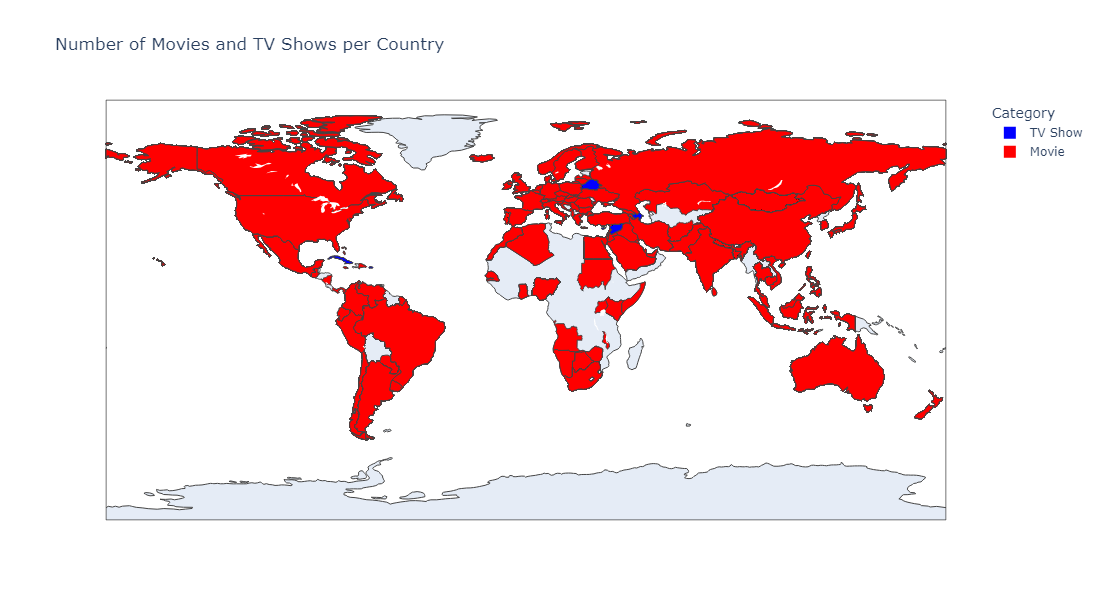

In [399]:
#Create the choropleth map
fig = px.choropleth(New_Data, 
                    locations="Country", 
                    locationmode='country names', 
                    color="Category",  # Adjust this based on the column representing values (e.g., number of movies/TV shows)
                    hover_name="Country", 
                    color_continuous_scale="OrRd", 
                    color_discrete_map={"Movie": "e", "TV Show": "blue"},
                    title="Number of Movies and TV Shows per Country")

# Adjust the size of the map
fig.update_layout(
    width=1000,  # Adjust the width as needed
    height=600   # Adjust the height as needed
)

# Show the plot
fig.show()